In [1]:
try:
  import numpy as np
  import pandas as pd
except Exception as e:
  print('Error in Importing Libraries ',e)

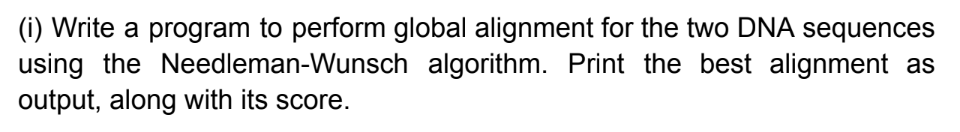

In [2]:
def get_score(matrix, seq1, seq2, i, j, match_score, gap_penalty, mismatch_penalty):
    try:
        if seq1[i - 1] == seq2[j - 1]:
            return matrix[i - 1][j - 1] + match_score
        return max(
            matrix[i - 1][j] + gap_penalty,
            matrix[i][j - 1] + gap_penalty,
            matrix[i - 1][j - 1] + mismatch_penalty
        )
    except IndexError:
        raise IndexError("Index out of range. Please check the sequences and matrix dimensions.")

In [3]:
def get_best_alignment(matrix, seq1, seq2, n, m, gap_penalty):
    try:
        best_alignment1 = ''
        best_alignment2 = ''
        i = n
        j = m

        while i > 0 or j > 0:
            if j > 0 and matrix[i][j] == matrix[i][j - 1] + gap_penalty:
                best_alignment1 = '-' + best_alignment1
                best_alignment2 = seq2[j - 1] + best_alignment2
                j -= 1
            elif i > 0 and matrix[i][j] == matrix[i - 1][j] + gap_penalty:
                best_alignment1 = seq1[i - 1] + best_alignment1
                best_alignment2 = '-' + best_alignment2
                i -= 1
            else:
                best_alignment1 = seq1[i - 1] + best_alignment1
                best_alignment2 = seq2[j - 1] + best_alignment2
                i -= 1
                j -= 1

        return best_alignment1, best_alignment2  # Return the alignments
    except Exception as e:
        print("An error occurred while finding the best alignment:", e)


In [6]:
def needleman_algorithm(seq1, seq2):
    try:
        # User Input for Match, Mismatch, and Gap Penalty
        match_score = 1
        mismatch_penalty = -1
        gap_penalty = -2

        # Initializing the Matrix with 0 and filling the first row and column
        n = len(seq1)
        m = len(seq2)
        matrix = [[i * gap_penalty if j == 0 else j * gap_penalty if i == 0 else 0 for j in range(m + 1)] for i in range(n + 1)]

        # Fill in the Scoring Matrix
        for i in range(1, n + 1):
            for j in range(1, m + 1):
                matrix[i][j] = get_score(matrix, seq1, seq2, i, j, match_score, gap_penalty, mismatch_penalty)

        # Traceback to find the Best Alignment Using Backtracking
        best_alignment1, best_alignment2 = get_best_alignment(matrix, seq1, seq2, n, m, gap_penalty)

        return best_alignment1, best_alignment2, matrix
    except Exception as e:
        print("An error occurred while executing Needleman-Wunsch algorithm:", e)

In [7]:
with open('align_nw.inp', 'r') as f:
    data = f.readlines()

# read the sequences and align them
for i in range(0, len(data), 2):
    seq1 = data[i].strip()
    seq2 = data[i+1].strip()
    alignment1, alignment2, matrix = needleman_algorithm(seq1, seq2)

    print('Best Alignment')
    print(alignment1)
    print(alignment2)

    print(f'Alignment Score : {matrix[len(seq1)][len(seq2)]}')
    print('-'*20, '\n')

Best Alignment
GC-TATGCCACGC
GCGTATGC-ACGC
Alignment Score : 7
-------------------- 

Best Alignment
INTENTION
EXECUTION
Alignment Score : -1
-------------------- 

Best Alignment
abceh
abcfh
Alignment Score : 3
-------------------- 

Best Alignment
CTCGC-G
GT-GCTG
Alignment Score : -1
-------------------- 

Best Alignment
GC-TATGCCACGC
GCGTATGC-ACGC
Alignment Score : 7
-------------------- 



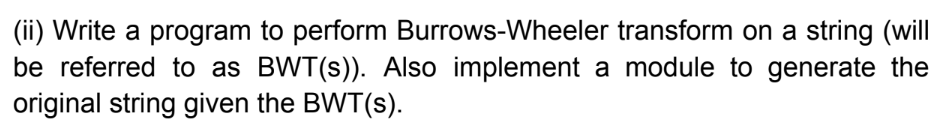

In [8]:
def burrows_wheeler_transform(s):
    try:
        s = s + '$'
        table = sorted(s[i:] + s[:i] for i in range(len(s)))
        last_column = [row[-1] for row in table]
        return ''.join(last_column)
    except Exception as e:
        return f"Error in Burrows-Wheeler Transform: {e}"

In [9]:
def inverse_burrows_wheeler_transform(r):
    try:
        table = [''] * len(r)
        for i in range(len(r)):
            table = sorted(r[i] + table[i] for i in range(len(r)))  # Insert and sort
        original_string = next(row.rstrip('$') for row in table if row.endswith('$'))
        return original_string
    except Exception as e:
        return f"Error in Inverse Burrows-Wheeler Transform: {e}"

In [10]:
def process_bwt_file(file_name):
    try:
        # Read the bwt.inp file
        with open(file_name, 'r') as f:
            data = f.readlines()

        # Iterate over every line and perform the Burrows-Wheeler Transform and its inverse
        for s in data:
            s = s.strip()
            bwt = burrows_wheeler_transform(s)
            inv_bwt = inverse_burrows_wheeler_transform(bwt)
            print("BWT:", bwt)
            print("Inverse BWT:", inv_bwt)
            print('-'*20, '\n')

    except FileNotFoundError:
        print(f"Error: File '{file_name}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Process the bwt.inp file
process_bwt_file('bwt.inp')

BWT: iwdnlhe$e
Inverse BWT: newdelhi
-------------------- 

BWT: smnpbnnaaaaa$a
Inverse BWT: panamabananas
-------------------- 

BWT: annb$aa
Inverse BWT: banana
-------------------- 

BWT: do$oodwg
Inverse BWT: dogwood
-------------------- 

BWT: ipssm$pissii
Inverse BWT: mississippi
-------------------- 

